#  전자제품 매장 이벤트를 통한 퍼널 분석

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/events.csv')

# 데이터 전처리

In [ ]:
# ID 정보 문자열 변환

df['user_id'] = df['user_id'].astype(str)
df['category_id'] = df['category_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)

In [ ]:
# 날짜 구분 컬럼(년/월/일)

df['event_time'] = pd.to_datetime(df['event_time'])

df['year'], df['month'], df['day'], df['hour'] = df['event_time'].dt.year,  df['event_time'].dt.month,  df['event_time'].dt.day, df['event_time'].dt.hour

In [ ]:
# 카테고리 구분 컬럼(depth=3)

df[['main_category','sub_category','sub_sub_category']] = df['category_code'].str.split('.', n=2,expand=True)

In [ ]:
df.to_csv('processed_data.csv')

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,year,month,day,hour,year_month,main_category,sub_category,sub_sub_category
0,2020-09-24 11:57:06+00:00,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020,9,24,11,2020-09,electronics,telephone,None
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020,9,24,11,2020-09,computers,components,cooler
2,2020-09-24 11:57:27+00:00,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020,9,24,11,2020-09,NaN,NaN,NaN
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020,9,24,11,2020-09,computers,peripherals,printer
4,2020-09-24 11:57:36+00:00,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020,9,24,11,2020-09,NaN,NaN,NaN


* 1차 view > 2회 이상 view > cart or purchase

# EDA

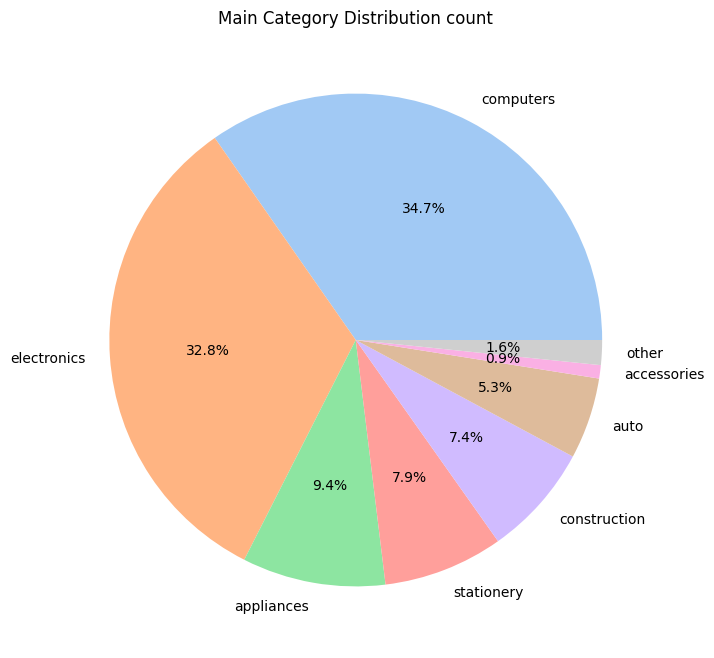

In [ ]:
# 메인 카테고리 비율 시각화

main_category = df.groupby('main_category')['product_id'].nunique().sort_values(ascending=False).reset_index()

main_Cat = main_category.copy()

main_Cat.iloc[7] = ['other',main_Cat.iloc[7:]['product_id'].sum()]

plt.pie(data=main_Cat.iloc[:8], x='product_id', labels='main_category', autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=8))
plt.title('Main Category Distribution count')
plt.show()

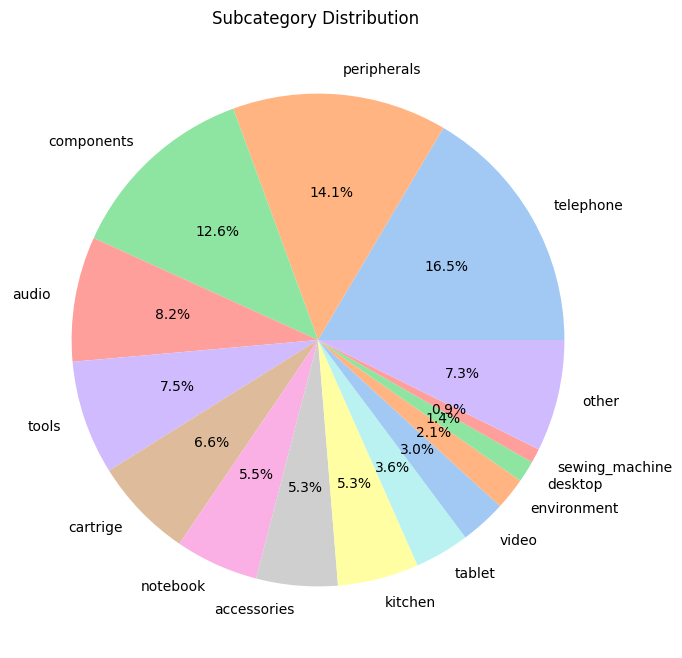

In [ ]:
# 서브 카테고리 비율 시각화

sub_category = df.groupby('sub_category')['product_id'].nunique().sort_values(ascending=False).reset_index()

sub_category.columns = ['sub_category', 'count']
sub_Cat = sub_category.copy()

sub_Cat.iloc[14] = ['other',sub_category.iloc[14:]['count'].sum()]

plt.figure(figsize=(15, 8))
plt.pie(data=sub_Cat.iloc[0:15], x='count',labels='sub_category', autopct='%1.1f%%', colors=sns.color_palette('pastel', n_colors=14))
plt.title('Subcategory Distribution ')
plt.show()

In [ ]:
# 하루 2회 이상 액션이 있는 고객

user_cnt_by_day = df.groupby(['user_id', 'day']).size().reset_index(name='visit_count')
user_cnt_by_day['revisit'] = user_cnt_by_day['visit_count'] > 1

revisit_rate = user_cnt_by_day['revisit'].mean()

user_cnt_by_day

,user_id,day,visit_count,revisit
0,1515915625353230922,2,1,False
1,1515915625353234047,1,1,False
2,1515915625353234047,29,2,True
3,1515915625353262977,25,1,False
4,1515915625353294441,1,15,True
...,...,...,...,...
20610,1515915625521793617,2,1,False
20611,1515915625521793867,2,1,False
20612,1515915625521793909,2,1,False
20613,1515915625521794096,2,1,False


<ipython-input-64-61ae393c574c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=visit_data, x='category', palette='pastel')


<Axes: xlabel='category', ylabel='count'>

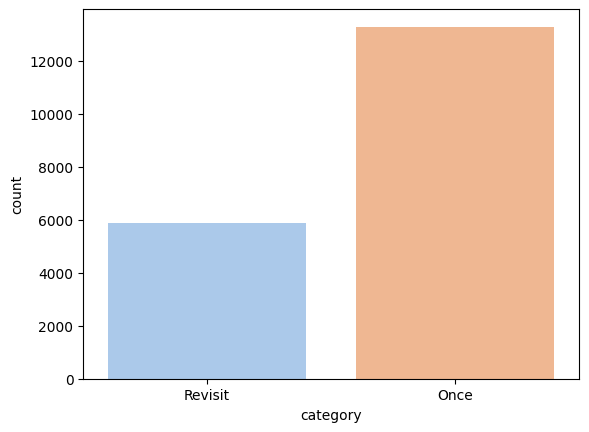

In [ ]:
# 이탈 고객 비율 탐색

user_counts = df['user_id'].value_counts()

revisit = user_counts > 1
once = user_counts == 1

visit_data = pd.DataFrame({
    'product_id': user_counts.index,
    'revisit': revisit,
    'once': once
})

visit_data['category'] = visit_data.apply(lambda x: 'Revisit' if x['revisit'] else 'Once', axis=1)

sns.countplot(data=visit_data, x='category', palette='pastel')

<ipython-input-30-68365863b15d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x="event_type",  palette='pastel')


<Axes: xlabel='event_type', ylabel='count'>

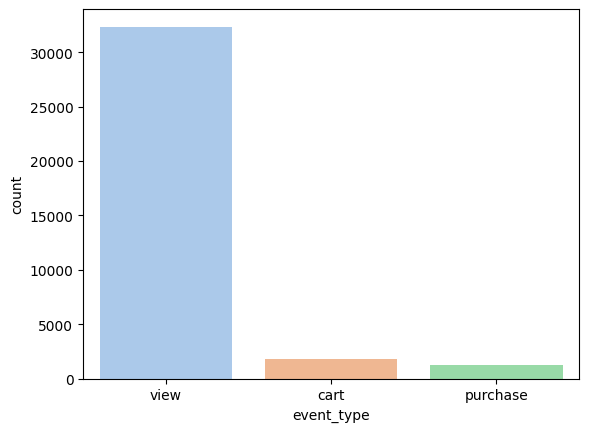

In [ ]:
# 액션 비율 시각화

sns.countplot(df, x="event_type",  palette='pastel')

In [ ]:
cat_conv = df.groupby(['category_code','event_type']).count()
cat_conv

event_time  product_id  \
category_code                     event_type                           
accessories.bag                   cart                 3           3   
                                  purchase             2           2   
                                  view               100         100   
apparel.glove                     view                 1           1   
appliances.environment.air_heater cart                 1           1   
...                                                  ...         ...   
stationery.paper                  cart                 1           1   
                                  view                80          80   
stationery.stapler                cart                 6           6   
                                  purchase             5           5   
                                  view                42          42   

                                              category_id  brand  price  \
category_code                     event_type                              
accessories.bag                   cart                  3      3      3   
                                  purchase              2      2      2   
                                  view                100     93    100   
apparel.glove                     view                  1      1      1   
appliances.environment.air_heater cart                  1      0      1   
...                                                   ...    ...    ...   
stationery.paper                  cart                  1      1      1   
                                  view                 80     74     80   
stationery.stapler                cart                  6      6      6   
                                  purchase              5      5      5   
                                  view                 42     37     42   

                                              user_id  user_session  
category_code                     event_type                         
accessories.bag                   cart              3             3  
                                  purchase          2             2  
                                  view            100           100  
apparel.glove                     view              1             1  
appliances.environment.air_heater cart              1             1  
...                                               ...           ...  
stationery.paper                  cart              1             1  
                                  view             80            80  
stationery.stapler                cart              6             6  
                                  purchase          5             5  
                                  view             42            42  

[228 rows x 7 columns]